<a href="https://colab.research.google.com/github/mhalverson1/helloAI/blob/main/Copy_of_keras_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# based on https://www.sitepoint.com/keras-digit-recognition-tutorial/

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras.datasets.mnist as kdm
from keras.utils import to_categorical

# tf.config.set_visible_devices([], 'GPU') # if you have an m1/m2 mac, uncomment this line to run wayyyy faster if you have local install of jupyter. leave commented if you are running on google colab 

(x_train, y_train), (x_test, y_test) = kdm.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

print("before converting...", y_train[0])

# reshape
img_rows, img_cols = 28, 28
# normalize inputs to between 0 and 1
import numpy as np
x_train = np.true_divide(x_train, 255)
x_test = np.true_divide(x_test, 255)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
print(y_test[0])

# convert to vector outputs 
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print("after converting y...", y_test[0])

model = keras.models.Sequential([
  layers.Flatten(input_shape=(28,28)),
  layers.Dense(100, activation='sigmoid'),
  layers.Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=10,
          epochs=1,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save("test_model.h5")

11490434/11490434 [==============================] - 0s 0us/step
before converting... 5
7
after converting y... [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
6000/6000 [==============================] - 30s 5ms/step - loss: 0.3236 - accuracy: 0.9127 - val_loss: 0.1821 - val_accuracy: 0.9465
Test loss: 0.18214891850948334
Test accuracy: 0.9465000033378601


In [2]:
def findTroublesomeImageKERAS(model, x_test):
  worsta = 1
  worsti = 0
  for i in range(len(x_test)):
    prediction = model.predict(x_test[i:i+1], verbose=False)
    max_a = np.max(prediction)
    if max_a < worsta:
      worsta = max_a
      worsti = i
  return (worsta, worsti)

In [3]:
print(score)
#print(x_test[768])
a = model.predict(x_test[768:769])
print(a)
print(y_test[768])
troublesome = findTroublesomeImageKERAS(model, x_test)
print(troublesome)



[0.18214891850948334, 0.9465000033378601]
1/1 [==============================] - 0s 127ms/step
[[1.1298975e-07 9.9553263e-01 5.0704507e-04 6.6811725e-04 7.9759002e-06
  3.4866220e-04 2.3282605e-04 1.1812335e-04 2.5227540e-03 6.1822509e-05]]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
(0.26479793, 4761)


1/1 [==============================] - 0s 21ms/step
[[6.3076332e-05 2.1371821e-01 1.9672387e-03 4.7362123e-02 4.4317998e-02
  1.6304728e-01 1.6867911e-05 1.8375945e-01 2.6479793e-01 8.0949761e-02]]


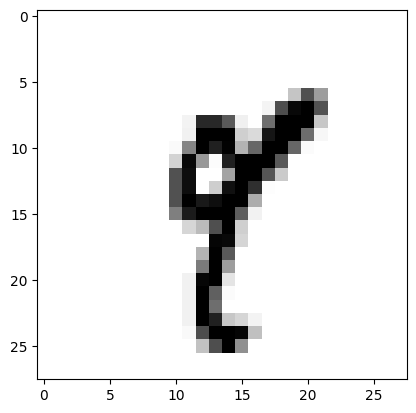

In [4]:
worsti = troublesome[1]
a = model.predict(x_test[worsti:worsti+1])
print(a)
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(np.reshape(x_test[worsti], (28,28)),cmap="gray_r")

In [5]:
def dec_to_binvector4(dec):
  binstr = "{0:04b}".format(int(dec))
  binvect = []
  for b in binstr:
    binvect.append(int(b))
  return binvect

# expects y_data to be a list of nonnegative integer numbers (e.g., 0, 1, 2, 3)
# returns the binary representation of each y using the specified number of bits
def to_binary(y_data):
  return [np.array(dec_to_binvector4(y)).reshape(4, 1) for y in y_data]

print(dec_to_binvector4(7))

[0, 1, 1, 1]


In [6]:
# based on https://www.sitepoint.com/keras-digit-recognition-tutorial/

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras.datasets.mnist as kdm
from keras.utils import to_categorical


(x_train, y_train), (x_test, y_test) = kdm.load_data()


# reshape
img_rows, img_cols = 28, 28
# normalize inputs to between 0 and 1
import numpy as np
x_train = np.true_divide(x_train, 255)
x_test = np.true_divide(x_test, 255)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# convert to vector outputs 
num_classes = 10
y_train = to_binary(y_train)
y_test = to_binary(y_test)

y_train = np.array(y_train).reshape(60000, 4)
y_test = np.array(y_test).reshape(10000, 4)

model = keras.models.Sequential([
  layers.Flatten(input_shape=(28,28)),
  layers.Dense(100, activation='sigmoid'),
  layers.Dense(10, activation='sigmoid'),
  layers.Dense(4, activation='sigmoid'),
])

model.compile(loss='mean_squared_error',
      optimizer='adam',
      metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=10,
          epochs=30,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save("test_model.h5")

Epoch 1/30
6000/6000 [==============================] - 19s 3ms/step - loss: 0.0675 - accuracy: 0.5636 - val_loss: 0.0287 - val_accuracy: 0.6301
Epoch 2/30
6000/6000 [==============================] - 15s 3ms/step - loss: 0.0229 - accuracy: 0.6405 - val_loss: 0.0198 - val_accuracy: 0.6464
Epoch 3/30
6000/6000 [==============================] - 15s 3ms/step - loss: 0.0159 - accuracy: 0.6765 - val_loss: 0.0161 - val_accuracy: 0.7130
Epoch 4/30
6000/6000 [==============================] - 15s 3ms/step - loss: 0.0124 - accuracy: 0.6927 - val_loss: 0.0151 - val_accuracy: 0.7244
Epoch 5/30
6000/6000 [==============================] - 15s 3ms/step - loss: 0.0102 - accuracy: 0.6963 - val_loss: 0.0133 - val_accuracy: 0.7275
Epoch 6/30
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0087 - accuracy: 0.7096 - val_loss: 0.0129 - val_accuracy: 0.7103
Epoch 7/30
6000/6000 [==============================] - 15s 3ms/step - loss: 0.0076 - accuracy: 0.7200 - val_loss: 0.0121 - val_ac